In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [7]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)
df_events = df_events[["person","device_type","screen_resolution","operating_system_version","browser_version"]]
df_events.count()

person                      1011288
device_type                   87378
screen_resolution             87378
operating_system_version      87378
browser_version               87378
dtype: int64

In [8]:
models = df_events.loc[(df_events["device_type"].isnull() == False) & (df_events["device_type"] != "Unknown"),:]
models = models.drop_duplicates(subset='person')
device = models["device_type"].value_counts()
device

Smartphone    14307
Computer      12074
Tablet          478
Name: device_type, dtype: int64

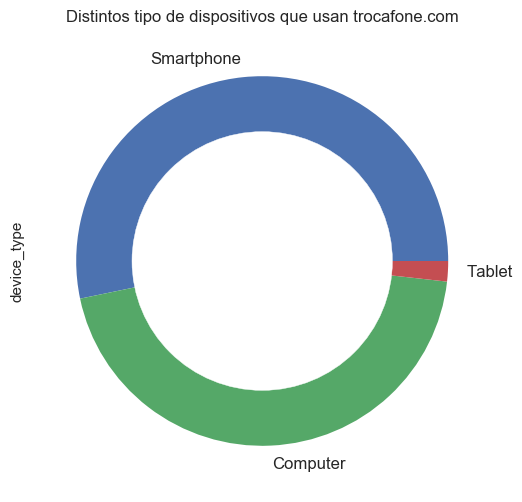

In [9]:
ax = device.plot(kind = 'pie', title = "Distintos tipo de dispositivos que usan trocafone.com",figsize =(6,6),legend = False, fontsize = 12)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

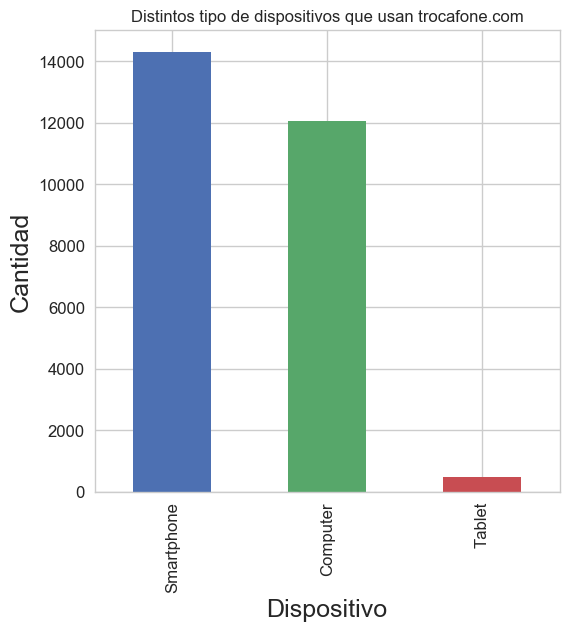

In [10]:
ax = device.plot(kind = 'bar', title = "Distintos tipo de dispositivos que usan trocafone.com",figsize =(6,6),legend = False, fontsize = 12,color =[["#4d70b2","#57a76a","#c84d52"]])
ax.set_xlabel("Dispositivo", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
plt.show()

In [11]:
celus = df_events.loc[df_events["device_type"] == "Smartphone",:]
celus = celus.drop_duplicates(subset='person')

celus["system_op"] = celus['operating_system_version'].apply(lambda x: x.split('.')[0])
celus
so_smart = celus["system_op"].value_counts().head(10)
so_smart

Android 6           5311
Android 7           4258
Android 5           2420
Android 4           1037
iOS 11               753
Android 8            308
iOS 10               228
iOS 9                 99
Windows Phone 8       69
Windows Phone 10      46
Name: system_op, dtype: int64

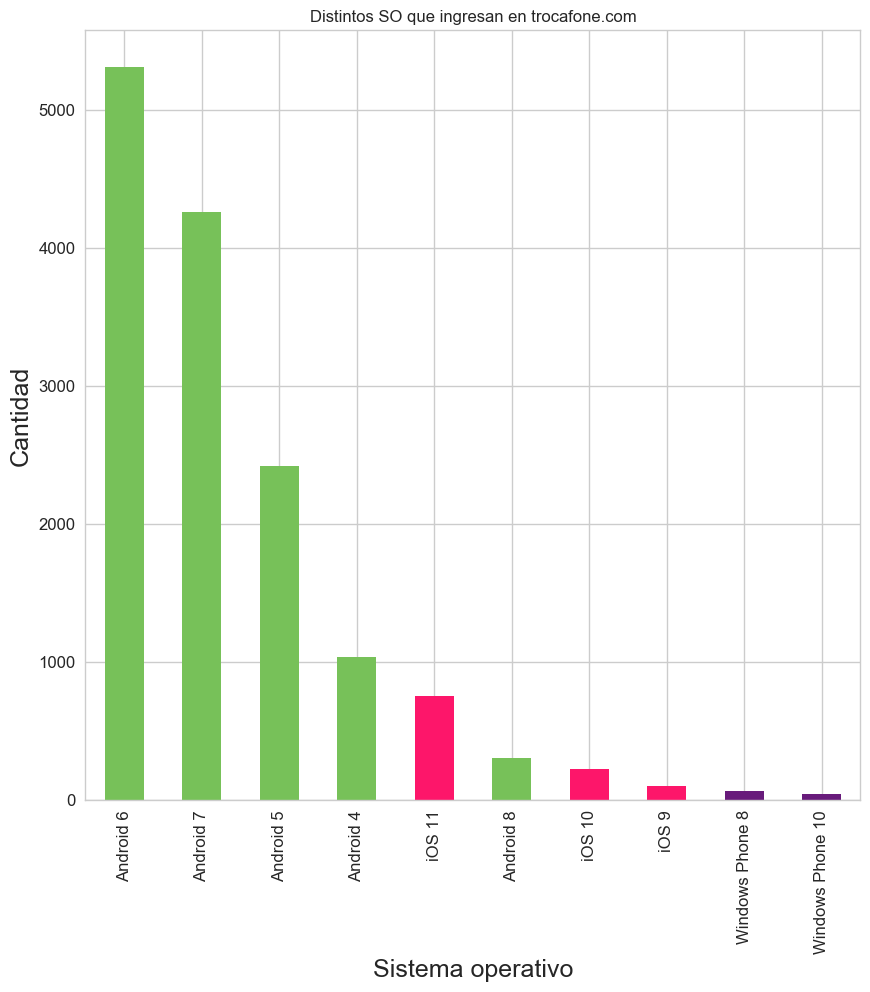

In [22]:
ax = so_smart.plot(kind = 'bar', title = "Distintos SO que ingresan en trocafone.com",figsize =(10,10),legend = False, fontsize = 12, color =[["#77C159","#77C159","#77C159","#77C159",'#FD166A',"#77C159",'#FD166A','#FD166A','#681B7B','#681B7B']])
ax.set_xlabel("Sistema operativo", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
plt.show()

In [13]:
compus = df_events.loc[df_events["device_type"] == "Computer",:]
compus = compus.drop_duplicates(subset='person')

#celus["system_op"] = celus['operating_system_version'].apply(lambda x: x.split('.')[0])
#celus
so_compus = compus["operating_system_version"].value_counts().head(10)
so_compus

Windows 7           6107
Windows 10          4685
Windows 8.1          915
Windows 8            194
Windows XP           168
Linux                130
Ubuntu                49
Mac OS X 10.13.4      45
Windows Vista         28
Mac OS X 10.12.6      14
Name: operating_system_version, dtype: int64

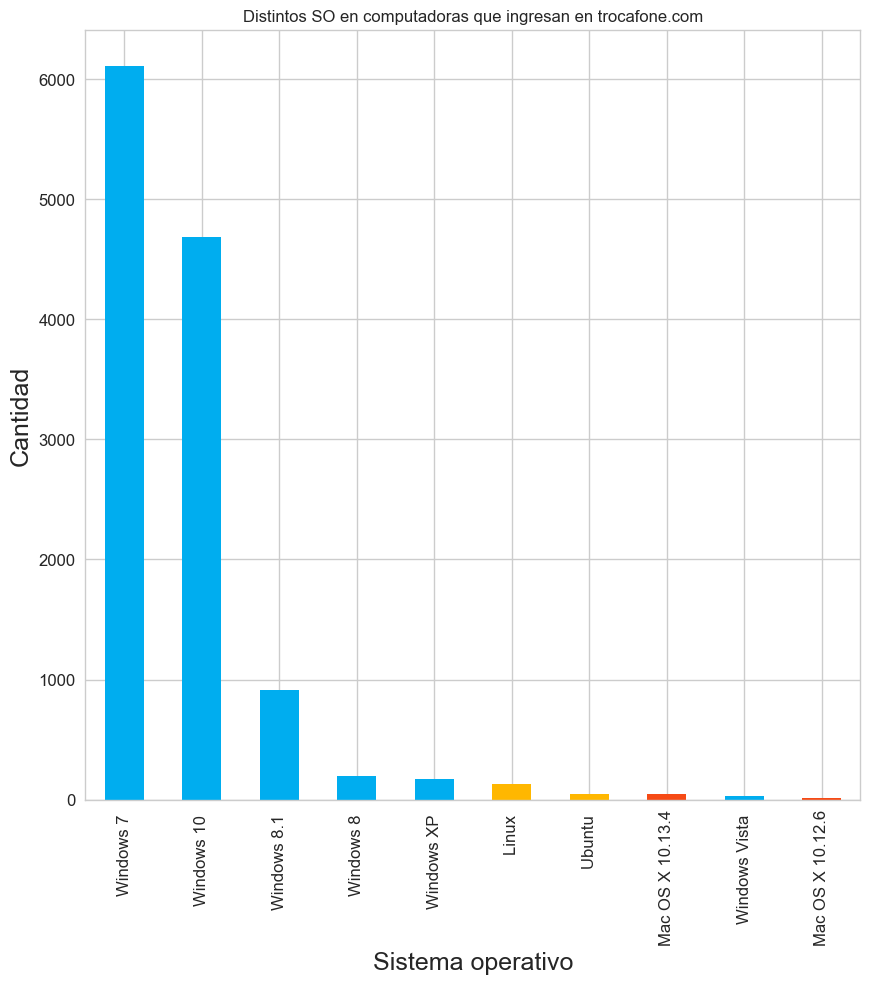

In [21]:
ax = so_compus.plot(kind = 'bar', title = "Distintos SO en computadoras que ingresan en trocafone.com",figsize =(10,10),legend = False, fontsize = 12,color = [["#00ADEF","#00ADEF","#00ADEF","#00ADEF","#00ADEF","#FFB700","#FFB700","#F64A15","#00ADEF","#F64A15"]])
ax.set_xlabel("Sistema operativo", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
plt.show()

In [28]:
resolucion_s = df_events.loc[df_events["device_type"] == "Smartphone",:]
resolucion_s = resolucion_s.drop_duplicates(subset='person')
resolucion_s = resolucion_s["screen_resolution"].value_counts().head(20)
resolucion_s

360x640      9111
320x534      1546
320x570      1243
320x568       577
375x667       321
412x732       244
424x753       229
320x480       228
320x569       155
414x736        89
480x800        69
320x427        69
640x360        57
720x1280       56
360x740        50
412x846        47
534x320        37
570x320        37
360x720        32
1080x1920      29
Name: screen_resolution, dtype: int64

In [38]:
resolucion_c = df_events.loc[df_events["device_type"] == "Computer",:]
resolucion_c = resolucion_c.drop_duplicates(subset='person')
resolucion_c = resolucion_c["screen_resolution"].value_counts().head(10)
resolucion_c

1366x768     6415
1920x1080     930
1024x768      816
1360x768      750
1600x900      749
1440x900      673
1280x1024     573
1280x800      288
1280x720      251
1536x864      247
Name: screen_resolution, dtype: int64

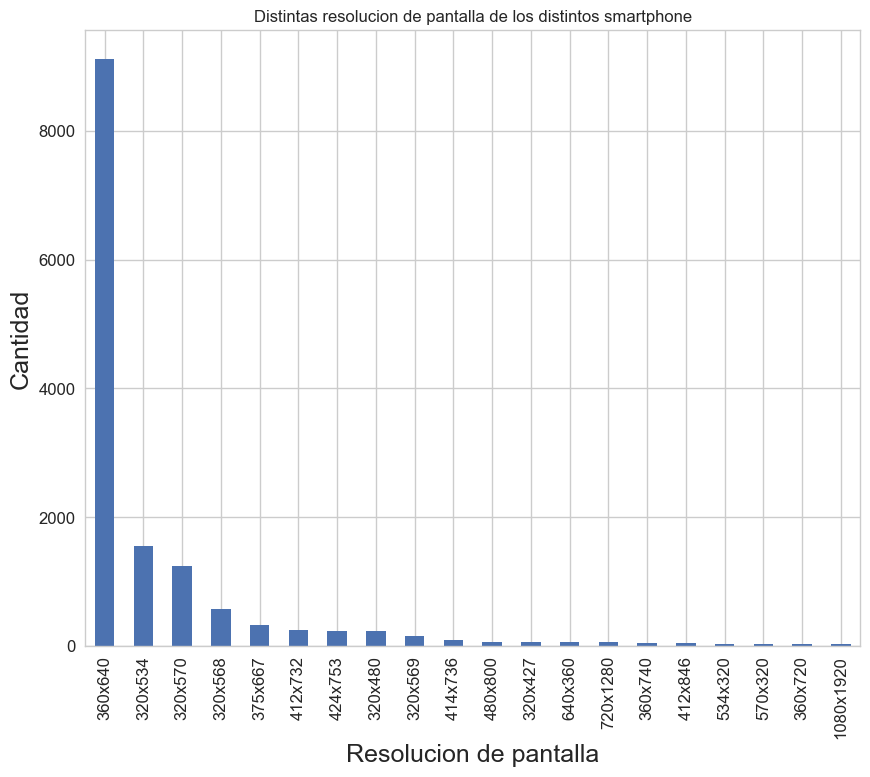

In [41]:
ax = resolucion_s.plot(kind = 'bar', title = "Distintas resolucion de pantalla de los distintos smartphone",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Resolucion de pantalla", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
plt.show()

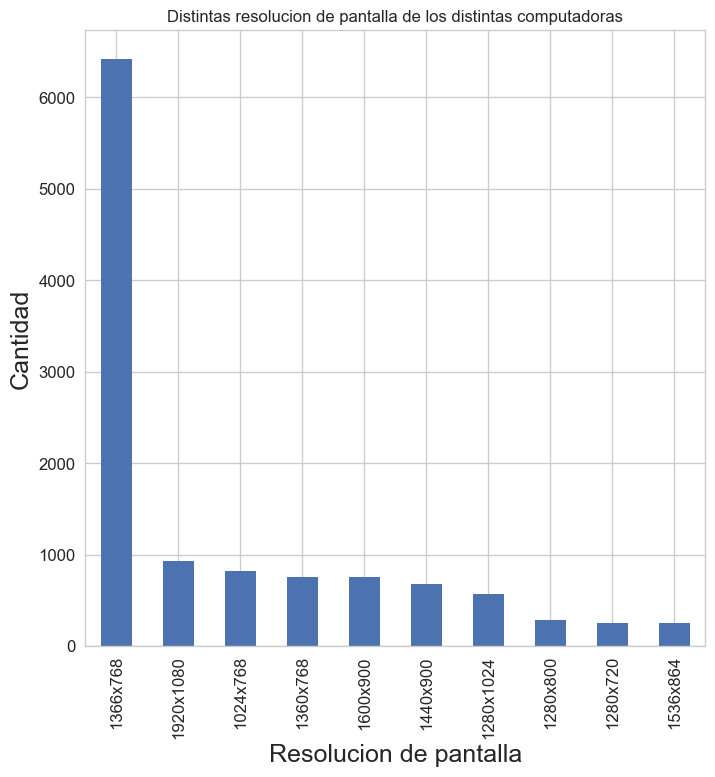

In [44]:
ax = resolucion_c.plot(kind = 'bar', title = "Distintas resolucion de pantalla de los distintas computadoras",figsize =(8,8),legend = False, fontsize = 12)
ax.set_xlabel("Resolucion de pantalla", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
plt.show()